In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pyarrow.parquet as pq

In [2]:
X_train = pd.read_parquet("train.parquet")
X_test = pd.read_parquet("test.parquet")

In [3]:

y_train = X_train["tip_amount"]

In [4]:
#X_train.info()
X_test.info()

#Pas de NAs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627163 entries, 0 to 2627162
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   payment_type           int64         
 8   fare_amount            float64       
 9   extra                  float64       
 10  mta_tax                float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  congestion_surcharge   float64       
 14  Airport_fee            float64       
 15  PU_location_lat        float64       
 16  PU_location_lon        float64       
 17  DO_location_lat        float64       
 18  DO_location_lon       

In [5]:
X_train.describe() - X_test.describe()

#On cherche à comparer la distribution des données d'entrainement et de test

#Ecart type et moyennes quasi invariantes  <0.1



,Airport_fee,DO_location_lat,DO_location_lon,PU_location_lat,PU_location_lon,RatecodeID,VendorID,congestion_surcharge,extra,fare_amount,improvement_surcharge,mta_tax,passenger_count,payment_type,tip_amount,tolls_amount,tpep_dropoff_datetime,tpep_pickup_datetime,trip_distance
count,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,-2.527163e+06,NaN,-2.527163e+06,-2527163,-2527163,-2.527163e+06
mean,-1.683047e-03,6.649990e-07,1.322962e-05,7.895556e-05,-1.425363e-04,-2.287472e-02,2.163494e-04,2.124726e-03,-1.234212e-02,-4.554352e-02,-2.573317e-05,-1.529911e-04,-4.003920e-03,1.208485e-03,NaN,1.882941e-03,-1 days +23:54:46.618301,-1 days +23:54:46.230751,-1.144276e-02
min,0.000000e+00,3.194477e-03,4.585618e-02,1.782656e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,7670 days 00:58:09,7670 days 00:57:07,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,-1 days +23:34:57.250000,-1 days +23:36:31,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0 days 00:35:59,0 days 00:35:50.500000,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,-1 days +23:20:00.500000,-1 days +23:15:30,0.000000e+00
max,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.562997e-02,0.000000e+00,0.000000e+00,0.000000e+00,-2.500000e+00,-6.052000e+02,0.000000e+00,-3.500000e+00,-2.000000e+00,0.000000e+00,NaN,-4.620000e+01,-1 days +12:52:50,-1 days +23:57:52,-2.636000e+01
std,-2.583026e-03,-6.199025e-05,9.511550e-05,3.874467e-05,-1.847739e-04,-1.158735e-01,-1.292599e-04,-3.697207e-03,-1.151490e-02,-1.049573e-01,1.110404e-03,7.520157e-04,-3.131846e-03,2.146457e-03,NaN,2.925993e-03,NaN,NaN,-1.194245e-02


In [6]:
X_test
#Si c'est le même mois, c'est intéressant car on suppose la même distribution en fonction des jours et heures

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon
row_ID,,,,,,,,,,,,,,,,,,,
0,2,2024-01-24 08:02:47,2024-01-24 08:04:45,1.0,0.36,1.0,N,1,4.4,0.0,0.5,0.0,1.0,2.5,0.0,40.740439,-73.976495,40.747746,-73.978492
1,2,2024-01-26 14:34:58,2024-01-26 14:42:51,1.0,1.78,1.0,N,1,10.7,0.0,0.5,0.0,1.0,2.5,0.0,40.791705,-73.973049,40.790011,-73.945750
2,2,2024-01-24 15:47:27,2024-01-24 15:51:48,2.0,0.43,1.0,N,2,5.8,0.0,0.5,0.0,1.0,0.0,0.0,40.791705,-73.973049,40.797962,-73.968168
3,2,2024-01-04 14:40:17,2024-01-04 14:44:21,1.0,0.61,1.0,N,1,5.8,0.0,0.5,0.0,1.0,2.5,0.0,40.783961,-73.978632,40.791705,-73.973049
4,2,2024-01-16 05:54:03,2024-01-16 05:55:59,1.0,0.71,1.0,N,2,5.1,1.0,0.5,0.0,1.0,2.5,0.0,40.748427,-73.999918,40.748427,-73.999918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627158,2,2024-01-09 14:22:25,2024-01-09 14:46:56,1.0,4.33,1.0,N,2,24.0,0.0,0.5,0.0,1.0,0.0,0.0,40.646985,-73.786530,40.704369,-73.793981
2627159,2,2024-01-02 19:23:16,2024-01-02 19:39:51,1.0,1.70,1.0,N,1,14.9,2.5,0.5,0.0,1.0,2.5,0.0,40.759818,-73.984197,40.748427,-73.999918
2627160,1,2024-01-28 12:29:13,2024-01-28 12:34:42,1.0,0.80,1.0,N,1,7.2,2.5,0.5,0.0,1.0,2.5,0.0,40.759818,-73.984197,40.773633,-73.981532


In [7]:
"""
La variable Store_and_fwd_flag ne semble pas être la plus pertinente.  De plus 99.5% sont non.
On estime que on va pas en déterminer des patterns. Encodons tout de même
"""
X_train['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    99578
Y      422
Name: count, dtype: int64

In [8]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder

le = LabelEncoder()
X_train['store_and_fwd_flag']=le.fit_transform(X_train['store_and_fwd_flag'])

In [9]:
X_train['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
0    99578
1      422
Name: count, dtype: int64

In [10]:
X_train['RatecodeID'].value_counts()

RatecodeID
1.0     95078
2.0      3439
99.0      968
3.0       262
5.0       235
4.0        18
Name: count, dtype: int64

In [11]:
#Encoder 99 à 6 pour que nos modèles utilisant la distance donnent une mauvaise interpretabilité au modèle
X_train['RatecodeID'][X_train['RatecodeID']==99]=6


C:\Users\rober\AppData\Local\Temp\ipykernel_31084\4093662270.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['RatecodeID'][X_train['RatecodeID']==99]=6
C:\Users\rober\AppData\Local\Temp\ipykernel_31084\4093662270.py:2: SettingWit

In [12]:
"""
Créer une colonne qui distingue l'heure et le jour. Encoder les jours jour+heure

"""


X_train['pickup_day'] = X_train['tpep_pickup_datetime'].dt.day
X_train['pickup_hour'] = X_train['tpep_pickup_datetime'].dt.hour + X_train['tpep_pickup_datetime'].dt.minute / 60


X_train['dropoff_day'] = X_train['tpep_dropoff_datetime'].dt.day
X_train['dropoff_hour'] = X_train['tpep_dropoff_datetime'].dt.hour + X_train['tpep_pickup_datetime'].dt.minute / 60





In [13]:
#On crée une colonne temps de trajet (journey time) arrondi à la minute près




X_train['tpep_pickup_datetime'] = pd.to_datetime(X_train['tpep_pickup_datetime'])
X_train['tpep_dropoff_datetime'] = pd.to_datetime(X_train['tpep_dropoff_datetime'])

# 
X_train['journey_time'] = X_train['tpep_dropoff_datetime'] - X_train['tpep_pickup_datetime']
X_train['journey_time'] = X_train['journey_time'].apply(lambda x: round(x.total_seconds() / 60,0))


print(X_train[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'journey_time']])


      tpep_pickup_datetime tpep_dropoff_datetime  journey_time
0      2024-01-15 20:37:28   2024-01-15 20:56:43          19.0
1      2024-01-25 19:41:24   2024-01-25 19:44:42           3.0
2      2024-01-25 15:48:48   2024-01-25 16:24:23          36.0
3      2024-01-27 00:47:26   2024-01-27 00:55:55           8.0
4      2024-01-28 13:14:26   2024-01-28 13:22:34           8.0
...                    ...                   ...           ...
99995  2024-01-19 09:12:12   2024-01-19 09:38:07          26.0
99996  2024-01-25 00:07:40   2024-01-25 00:25:13          18.0
99997  2024-01-08 09:27:23   2024-01-08 10:01:52          34.0
99998  2024-01-06 18:42:49   2024-01-06 19:23:57          41.0
99999  2024-01-25 22:43:34   2024-01-25 22:52:34           9.0

[100000 rows x 3 columns]


In [14]:
#Afficher la moyenne de tips_amount par heure au mois de janvier

# Créer une colonne avec les heures entières
X_train['pickup_hour_integer'] = X_train['pickup_hour'].astype(int)

average_tip_per_hour = X_train.groupby('pickup_hour_integer')['tip_amount'].mean().reset_index()
average_tip_per_hour.columns = ['hour', 'average_tip_amount']
print(average_tip_per_hour)



#On constate qu'entre 18h et 5h du matin, le montant des pourboirs est plus éléevé


    hour  average_tip_amount
0      0            3.686190
1      1            3.261132
2      2            2.984303
3      3            3.515227
4      4            3.692429
5      5            4.385025
6      6            3.167754
7      7            3.147411
8      8            3.150144
9      9            3.217022
10    10            3.170617
11    11            3.140968
12    12            3.143373
13    13            3.213351
14    14            3.527130
15    15            3.385926
16    16            3.678449
17    17            3.629441
18    18            3.484096
19    19            3.525798
20    20            3.553530
21    21            3.688447
22    22            3.635689
23    23            3.678629


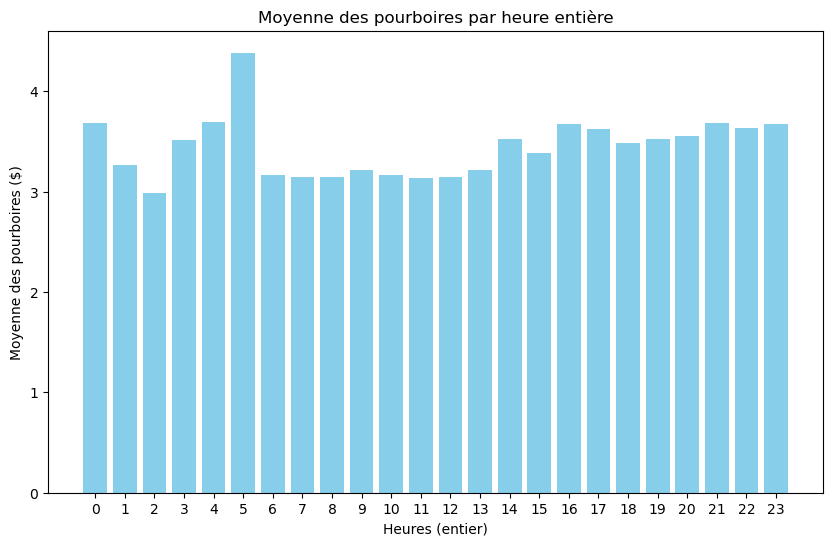

In [15]:
#Barplot de la moyenne de tips_amount par heure au mois de janvier
plt.figure(figsize=(10, 6))
plt.bar(average_tip_per_hour['hour'], average_tip_per_hour['average_tip_amount'], color='skyblue')


plt.xlabel('Heures (entier)')
plt.ylabel('Moyenne des pourboires ($)')
plt.title('Moyenne des pourboires par heure entière')
plt.xticks(average_tip_per_hour['hour'])  


plt.show()

In [16]:
#Temps de trajet moyen par km par jour élevé ==> influence sur le pourboire ??

"""
#Conforté par cet article 
:https://www.20minutes.fr/monde/4071075-20240117-new-york-sous-neige-apres-plus-sept-cent-jours-flocons
et après un regard sur les données météo à New York en janvier 2024, 
on a constaté une météo enneigée les 16, 18 et 19 janvier 2024 et le 29 janvier 2024 (pas mal de pluie),  

Peu-être les chauffeurs ont eu une reconnaissance plus élevée de leurs clients matérialisée par les pourboires
"""

X_train['time_per_km'] = X_train['journey_time'] / X_train['trip_distance']

# Groupement par jour pour calculer la moyenne du temps par km et la moyenne des pourboires
daily_stats = X_train.groupby('pickup_day').agg(
    avg_time_per_km=('time_per_km', 'mean'),
    avg_tip_amount=('tip_amount', 'mean')
).reset_index()

print(daily_stats)

"""
Les valeurs de distance moyen sont dominés par le 1e, le 16,17,18,24 et 27 janvier 2024
Les valeurs de pourboire moyen sont dominés par le 1e, le 15,16 et le 29 janvier 2024
Le 1e janvier correspond au jour de l'an (=> élan de générosité)
Le 16,17 et 18 correspondent aux jours d'enneigement
"""

    pickup_day  avg_time_per_km  avg_tip_amount
0            1         7.599248        3.650987
1            2         6.703482        3.552927
2            3         6.383251        3.419071
3            4         7.072398        3.293235
4            5         7.064989        3.293313
5            6         7.087553        2.990557
6            7         6.042905        3.446052
7            8         7.367034        3.414010
8            9         8.236522        3.244381
9           10         7.055177        3.461559
10          11         7.194707        3.487292
11          12         6.919918        3.437784
12          13         7.582465        3.278045
13          14         6.860766        3.500988
14          15         6.431790        3.676487
15          16         8.523829        3.694975
16          17         7.804728        3.537019
17          18         8.605357        3.514315
18          19         7.327674        3.244822
19          20         7.493402        3

"\nLes valeurs de distance moyen sont dominés par le 1e, le 16,17,18,24 et 27 janvier 2024\nLes valeurs de pourboire moyen sont dominés par le 1e, le 15,16 et le 29 janvier 2024\nLe 1e janvier correspond au jour de l'an (=> élan de générosité)\nLe 16,17 et 18 correspondent aux jours d'enneigement\n"

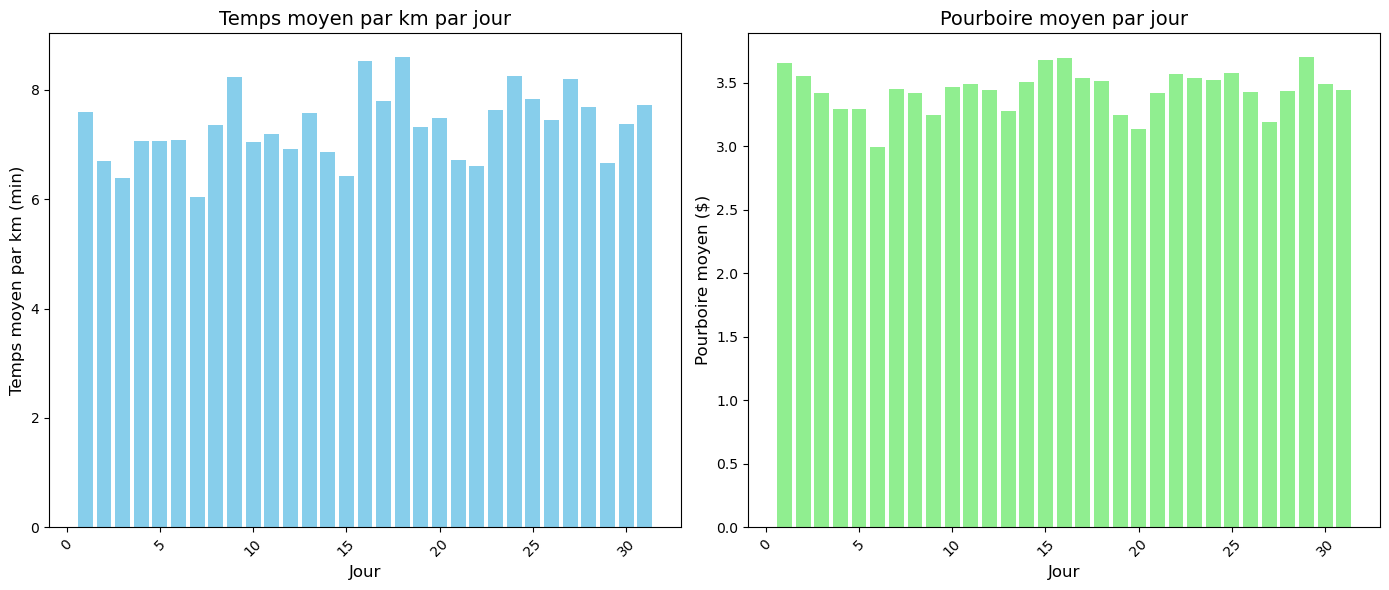

In [17]:



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Temps moyen par kilomètre par jour
ax1.bar(daily_stats['pickup_day'], daily_stats['avg_time_per_km'], color='skyblue')
ax1.set_title('Temps moyen par km par jour', fontsize=14)
ax1.set_xlabel('Jour', fontsize=12)
ax1.set_ylabel('Temps moyen par km (min)', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Pourboire moyen par jour
ax2.bar(daily_stats['pickup_day'], daily_stats['avg_tip_amount'], color='lightgreen')
ax2.set_title('Pourboire moyen par jour', fontsize=14)
ax2.set_xlabel('Jour', fontsize=12)
ax2.set_ylabel('Pourboire moyen ($)', fontsize=12)
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

# on a constaté que la météo enneigée les 16, 18 et 19 janvier 2024 se répercute sur le temps moyen par km 
# et la météo pluvieuse du 27 janvier aussi,

#En revanche difficle d'établir un lien de cause à effet sur le montant du pourboire.

#La date a en revanche une influence sur le montant du pourboire


In [18]:
#Regarder l'influence des périodes de la journée sur les pourboires

def get_pickup_period(hour):
    if 6 <= hour <= 12:
        return 'Morning'
    elif 13 <= hour <= 18:
        return 'Afternoon'
    elif 18 < hour <= 22:
        return 'Evening'
    else:
        return 'Night'

X_train['pickup_period'] = X_train['pickup_hour'].apply(get_pickup_period)

print(X_train[['pickup_hour', 'pickup_period']].head())



   pickup_hour pickup_period
0    20.616667       Evening
1    19.683333       Evening
2    15.800000     Afternoon
3     0.783333         Night
4    13.233333     Afternoon


In [19]:
X_train['pickup_period'].value_counts()

pickup_period
Afternoon    32435
Evening      24122
Morning      22400
Night        21043
Name: count, dtype: int64

C:\Users\rober\AppData\Local\Temp\ipykernel_31084\3793494240.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pickup_period', y='tip_amount', data=X_train, palette='Set2')


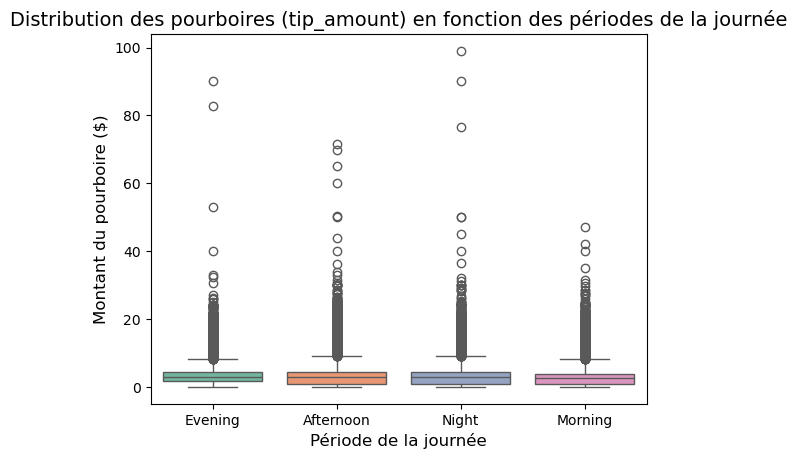

In [20]:
import seaborn as sns
# Créer un boxplot pour visualiser 'tip_amount' en fonction de 'pickup_period'


sns.boxplot(x='pickup_period', y='tip_amount', data=X_train, palette='Set2')
plt.title('Distribution des pourboires (tip_amount) en fonction des périodes de la journée', fontsize=14)
plt.xlabel('Période de la journée', fontsize=12)
plt.ylabel('Montant du pourboire ($)', fontsize=12)


plt.show()

#Des valeurs extremes de pourboires sont associées à la Nuit et au soir=> confirmation de notre intuition

C:\Users\rober\AppData\Local\Temp\ipykernel_31084\1907100350.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pickup_period', y='tip_amount', data=X_train, estimator='mean', ci=None, palette='Set2') #mean
C:\Users\rober\AppData\Local\Temp\ipykernel_31084\1907100350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pickup_period', y='tip_amount', data=X_train, estimator='mean', ci=None, palette='Set2') #mean


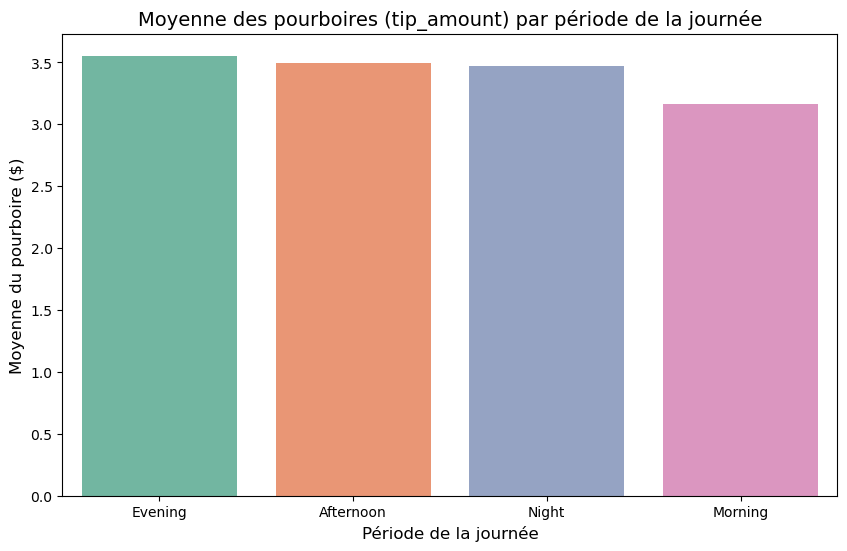

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='pickup_period', y='tip_amount', data=X_train, estimator='mean', ci=None, palette='Set2') #mean


plt.title('Moyenne des pourboires (tip_amount) par période de la journée', fontsize=14)
plt.xlabel('Période de la journée', fontsize=12)
plt.ylabel('Moyenne du pourboire ($)', fontsize=12)
plt.show()

#Mais pas de différence significative au niveau de la moyenne


In [22]:
"""
#Au vu de ces deux plots, on a peu de différence significative des moyennes et médianes selon la période
mais des valeurs extrêmes plus importantes pour Evening et Night
"""

'\n#Au vu de ces deux plots, on a peu de différence significative des moyennes et médianes selon la période\nmais des valeurs extrêmes plus importantes pour Evening et Night\n'

In [23]:
# Encoder manuellement "pickup_period" selon l'ordre croissant des valeurs moyennes 

X_train['pickup_period_encoded'] = X_train['pickup_period'].replace({
    'Morning': 0,        # 
    'Afternoon': 1,   # 
    'Evening': 2,       # 
    'Night': 3          # 
})


print(X_train[['pickup_period', 'pickup_period_encoded']].head())


  pickup_period  pickup_period_encoded
0       Evening                      2
1       Evening                      2
2     Afternoon                      1
3         Night                      3
4     Afternoon                      1


C:\Users\rober\AppData\Local\Temp\ipykernel_31084\2143722393.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train['pickup_period_encoded'] = X_train['pickup_period'].replace({


In [24]:
X_train.drop(columns=['pickup_hour_integer','time_per_km', 'pickup_period'],inplace=True) #pickup_hour
X_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon,pickup_day,pickup_hour,dropoff_day,dropoff_hour,journey_time,pickup_period_encoded
0,1,2024-01-15 20:37:28,2024-01-15 20:56:43,1.0,3.30,1.0,0,1,19.1,3.5,...,40.734576,-74.002875,40.768615,-73.965635,15,20.616667,15,20.616667,19.0,2
1,2,2024-01-25 19:41:24,2024-01-25 19:44:42,1.0,0.72,1.0,0,1,5.8,2.5,...,40.768615,-73.965635,40.780436,-73.957012,25,19.683333,25,19.683333,3.0,2
2,2,2024-01-25 15:48:48,2024-01-25 16:24:23,2.0,7.45,1.0,0,1,38.7,0.0,...,40.717773,-74.007880,40.780436,-73.957012,25,15.800000,25,16.800000,36.0,1
3,2,2024-01-27 00:47:26,2024-01-27 00:55:55,1.0,1.53,1.0,0,1,10.0,1.0,...,40.720889,-73.996919,40.747746,-73.978492,27,0.783333,27,0.783333,8.0,3
4,2,2024-01-28 13:14:26,2024-01-28 13:22:34,1.0,1.53,1.0,0,1,10.0,0.0,...,40.768615,-73.965635,40.747746,-73.978492,28,13.233333,28,13.233333,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,2024-01-19 09:12:12,2024-01-19 09:38:07,1.0,4.38,1.0,0,1,26.1,0.0,...,40.768615,-73.965635,40.718938,-73.990896,19,9.200000,19,9.200000,26.0,0
99996,2,2024-01-25 00:07:40,2024-01-25 00:25:13,1.0,5.34,1.0,0,1,25.4,1.0,...,40.748497,-73.992438,40.706808,-74.007496,25,0.116667,25,0.116667,18.0,3
99997,1,2024-01-08 09:27:23,2024-01-08 10:01:52,1.0,10.10,6.0,0,1,35.5,0.0,...,40.857779,-73.885867,40.773633,-73.981532,8,9.450000,8,10.450000,34.0,0
99998,2,2024-01-06 18:42:49,2024-01-06 19:23:57,1.0,5.82,1.0,0,2,36.6,0.0,...,40.780436,-73.957012,40.777427,-73.905407,6,18.700000,6,19.700000,41.0,2


In [25]:
X_train.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime'],inplace=True)

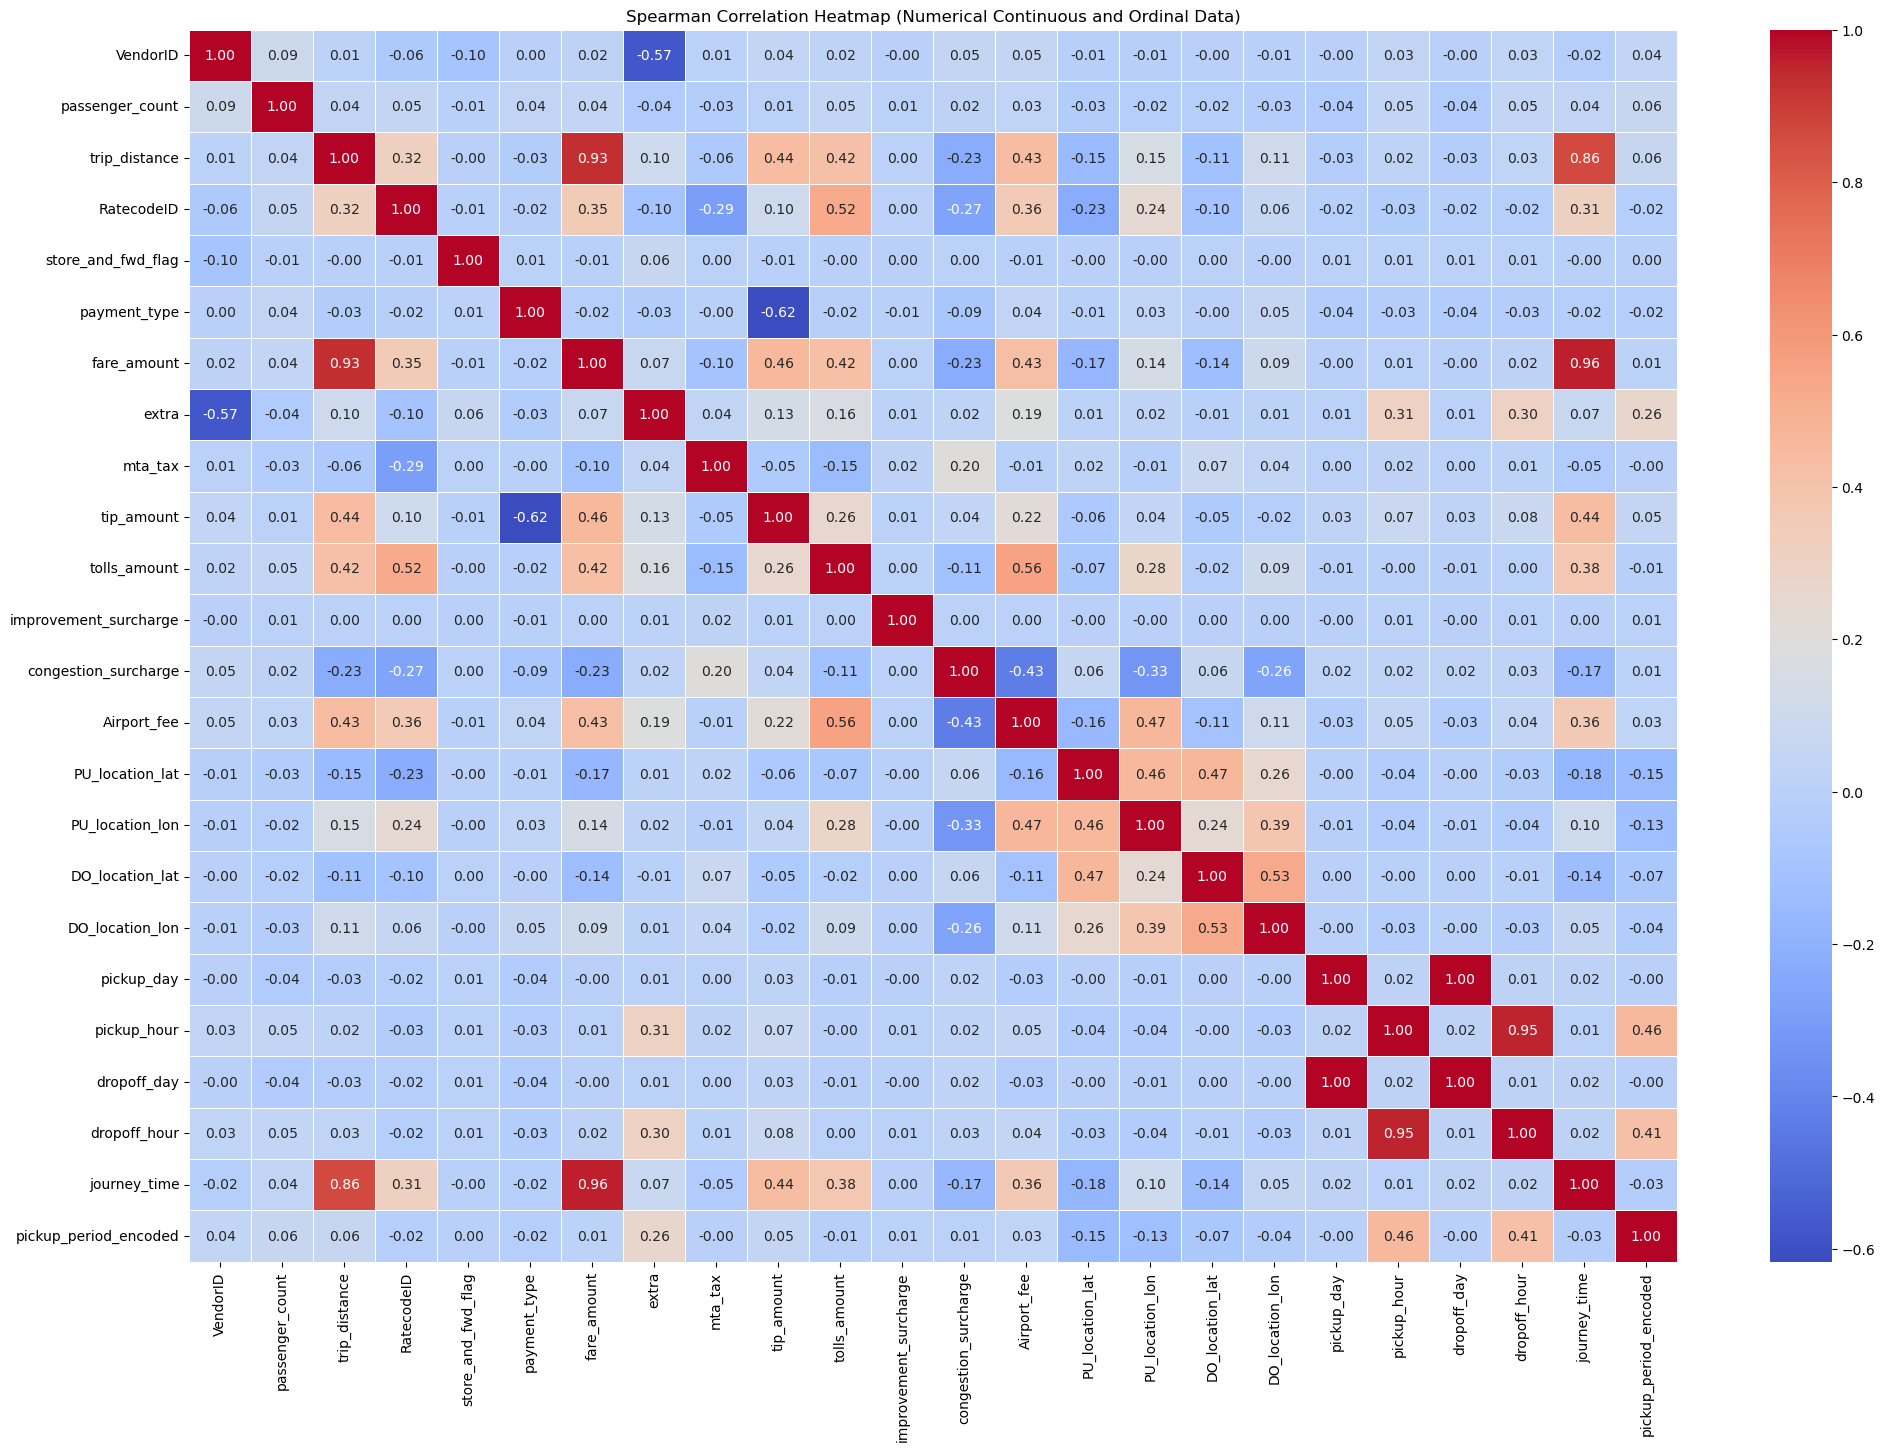

In [26]:
##Matrice de Spearman pour voir les corrélations significatives

# Calculate Spearman correlation matrix for numerical continuous and ordinal variables (avec et sans pickup_period)
spearman_corr = X_train.corr(method='spearman')


plt.figure(figsize=(24, 16))
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Spearman Correlation Heatmap (Numerical Continuous and Ordinal Data)')
plt.show()

#Bien observer les correlations avec tips

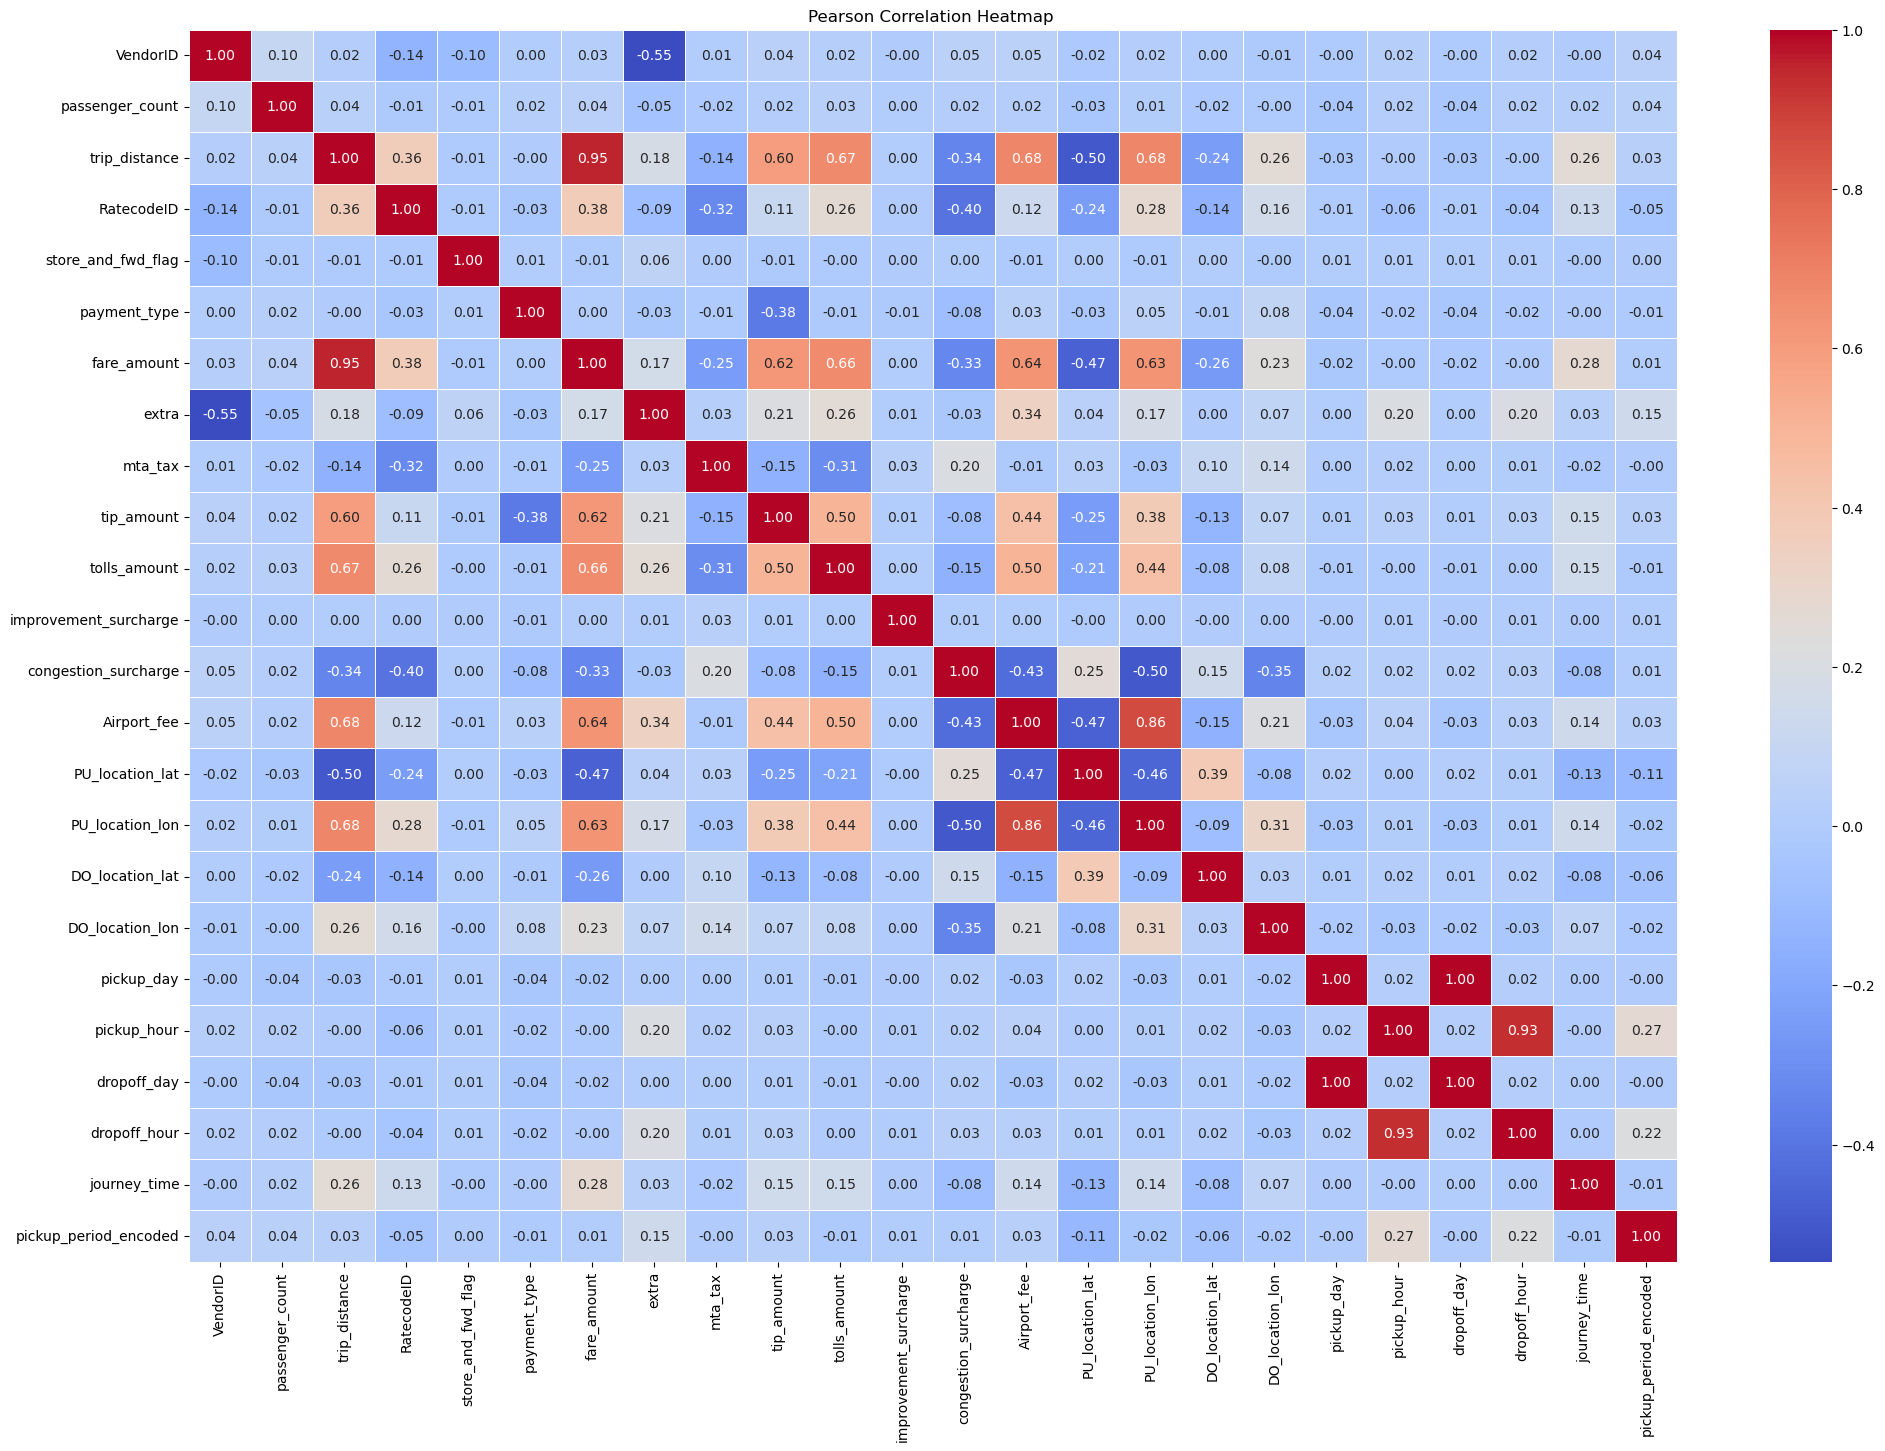

In [27]:
# Pearson matrix 
pearson_corr = X_train.corr(method='pearson')


plt.figure(figsize=(24, 16))
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Pearson Correlation Heatmap ')
plt.show()

#

In [28]:
X_train.to_parquet("train_fe.parquet") #fe pour feature engineering

#Nous enregistrons cette version après une premiere phase de feature engineering
#Testons un random Forest pour l'instant

In [54]:
from sklearn.model_selection import train_test_split
X_train.drop(columns=['tip_amount'],inplace=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25,random_state=42)

<Axes: ylabel='tip_amount'>

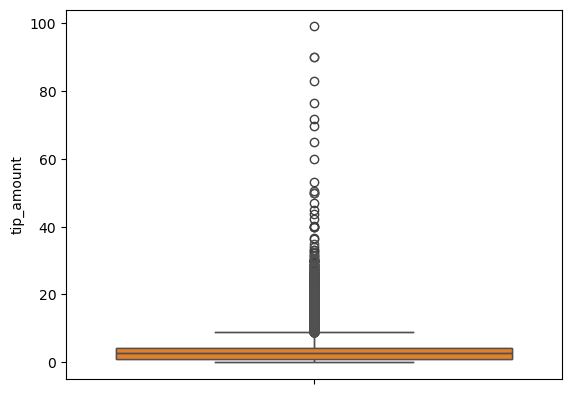

In [27]:
##On s'assure que des valeurs extrêmes soient représentés dans les deux afin d'obtenir une bonne généralistion
sns.boxplot(y_train)
#sns.boxplot(y_val)

In [28]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor(random_state=42)

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

param_distributions = {
  
    'max_features':['auto','log2','sqrt'],  #Justifier


    'bootstrap': [True, False], 

     'max_depth': [5,7, 10, 20] 
} 



grid = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, n_iter=20, cv=5, n_jobs=-1, scoring="r2") #Tester avec accuracy


In [30]:
model_grid=grid.fit(X_train,y_train)
rf_best=model_grid.best_estimator_

C:\Users\rober\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
35 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
29 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rober\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\rober\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\rober\anaconda3\Lib\site-packages

In [31]:
y_val_pred=rf_best.predict(X_val)

In [32]:
from sklearn.metrics import r2_score

r2 = r2_score(y_val, y_val_pred)
print("R² :", r2)


R² : 0.6953671757545876


In [33]:
#Entrainement final et prédiction avec un RF Regressor et Grid Search et les mêmes paramètres

"""
# Faire des prédictions sur le jeu de validation



prediction_1_bon_format = pd.DataFrame(np.arange(len(y_pred), dtype = int).T, columns  = ["row_ID"])
prediction_1_bon_format["tip_amount"] = y_pred
prediction_1_bon_format.to_parquet("prediction_xgboost_finetuned_last_wo_outliers_2.parquet")

"""

'\n# Faire des prédictions sur le jeu de validation\n\n\n\nprediction_1_bon_format = pd.DataFrame(np.arange(len(y_pred), dtype = int).T, columns  = ["row_ID"])\nprediction_1_bon_format["tip_amount"] = y_pred\nprediction_1_bon_format.to_parquet("prediction_xgboost_finetuned_last_wo_outliers_2.parquet")\n\n'